In [58]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib==3.10.7 from https://files.pythonhosted.org/packages/33/cd/b145f9797126f3f809d177ca378de57c45413c5099c5990de2658760594a/matplotlib-3.10.7-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.10.7-cp311-cp311-win_amd64.whl.metadata (11 kB)
INFO: pip is looking at multiple versions of ydata-profiling to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for seaborn==0.13.2 from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)

The conflict is caused by:
    The user requested matplotlib==3.10.7
    seaborn 0.13.2 depends on matplotlib!=3.6.1 and >=3.4
    ydata-profiling 4.18.0 depends on matplotlib<=3.10 and >=3.5

To fix this you could try to:
1. loosen the range of package versions you've speci

ERROR: Cannot install -r requirements.txt (line 8), matplotlib==3.10.7 and ydata-profiling==4.18.0 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [67]:
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import datetime as dt

In [68]:
df_r = pd.read_csv("datasets/rides.csv", sep=",", encoding="utf-8")
df_w = pd.read_csv("datasets/weather.csv", sep=",", encoding="utf-8")
df_r.columns = df_r.columns.str.lower().str.replace(" ", "_")
df_w.columns = df_w.columns.str.lower().str.replace(" ", "_")

In [69]:
def streets_format(tdf, column):
    tdf[column] = tdf[column].str.lower()
    tdf[column] = tdf[column].replace(regex=r"ул\.?\s?", value="")
    return tdf


def rayons_format(tdf, column):
    tdf[column] = tdf[column].str.lower()
    return tdf


for x in ["start_location", "end_location"]:
    df_r = streets_format(df_r, x)

for x in ["start_district", "end_district"]:
    df_r = rayons_format(df_r, x)

df_r["promo"] = df_r["promo"].apply(lambda x: True if x == 1 else False)
df_r["start_date"] = pd.to_datetime(df_r["start_date"])
df_r["end_date"] = pd.to_datetime(df_r["end_date"])

In [70]:
df_r["duration"] = (df_r["end_date"] - df_r["start_date"]).apply(lambda x: x.total_seconds() / 60)

In [71]:
df_r.head()

,id,start_date,end_date,start_location,start_district,end_location,end_district,distance,promo,duration
0,100340,2023-04-22 09:01:03,2023-04-22 09:24:45,шевченко,юго-восточный,майская,октябрьский,4069.0,False,23.700000
1,100341,2023-04-22 09:01:07,2023-04-22 09:29:32,чехова,заречный,спортивная,октябрьский,4515.0,False,28.416667
2,100342,2023-04-22 09:04:27,2023-04-22 09:42:46,буденного,октябрьский,суворова,ленинский,4520.0,False,38.316667
3,100343,2023-04-22 09:06:34,2023-04-22 09:38:23,труда,центральный,рабочая,северо-западный,3881.0,False,31.816667
4,100344,2023-04-22 09:09:27,2023-04-22 09:40:07,первомайская,северо-западный,юбилейная,юго-восточный,4029.0,False,30.666667


In [72]:
df_w.head()

,datetime,temperature,precipitation_total,wind_gust,wind_speed,cloud_cover_total,sunshine_duration
0,NaN,°C,mm,km/h,km/h,%,min
1,2023-04-01T00:00:00,8.740245,0.1,48.6,21.638964,90,0
2,2023-04-01T01:00:00,9.040245,0.2,55.44,22.493519,74,0
3,2023-04-01T02:00:00,8.880245,0.3,55.8,22.26477,72,0
4,2023-04-01T03:00:00,8.690246,0.3,55.44,21.94524,77,0


<Axes: ylabel='distance'>

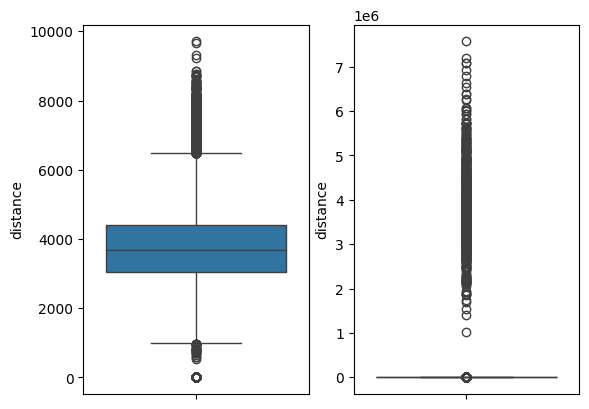

In [73]:
plt.subplot(1, 2, 1)
sns.boxplot(df_r[df_r['distance'] < 1000000]['distance'])
plt.subplot(1, 2, 2)
sns.boxplot(df_r['distance'])

In [74]:
print(df_r[df_r['distance'] > 1000000]['distance'].shape[0], df_r.shape[0])

622 102255


Выбросы по параметру distance начинаются с 1E6, остальные значения напоминают реальные (поездки на самокате в среднем около 4км, >=100км на самокате не проехать), выбросы по параметру distance можно заменить на среднее по группам

<Axes: ylabel='duration'>

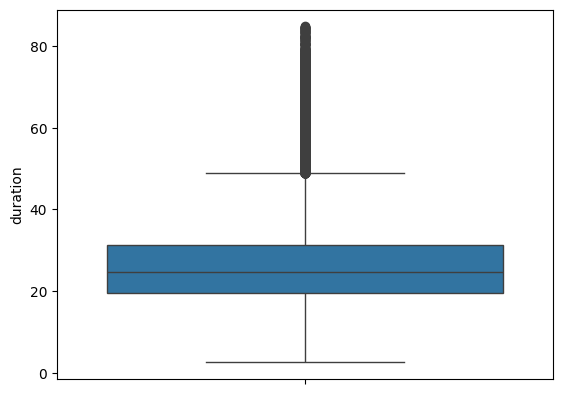

In [75]:
sns.boxplot(df_r['duration'])

пропуски есть только в 2 базовых столбцах - дистанция и время окончания

выбросы есть только в столбце distance, в этих столбцах можно просто заменить на среднее по группе (место и район старта и место и район финиша)

C:\Users\kostya.DESKTOP-LL8BKBQ\AppData\Local\Temp\ipykernel_20920\2646293495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[(x > 1000000) | (x < 10)] = None


<Axes: ylabel='distance'>

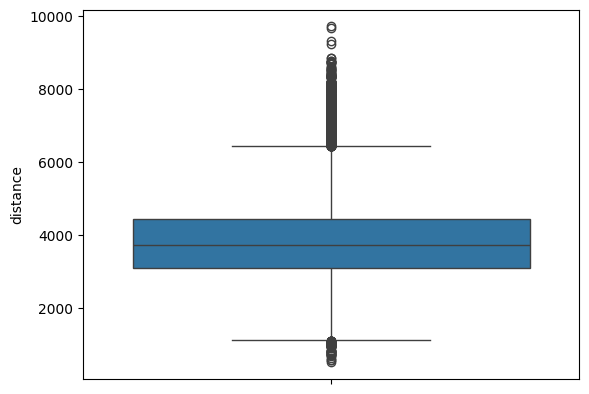

In [76]:
def ejection(x):
    x[(x > 1000000) | (x < 10)] = None
    return x



df_r["distance"] = df_r["distance"].transform(ejection)
sns.boxplot(df_r['distance'])

In [77]:
df_r["avg_speed"] = df_r["distance"] / df_r["duration"]
df_r.head()

,id,start_date,end_date,start_location,start_district,end_location,end_district,distance,promo,duration,avg_speed
0,100340,2023-04-22 09:01:03,2023-04-22 09:24:45,шевченко,юго-восточный,майская,октябрьский,4069.0,False,23.700000,171.687764
1,100341,2023-04-22 09:01:07,2023-04-22 09:29:32,чехова,заречный,спортивная,октябрьский,4515.0,False,28.416667,158.885630
2,100342,2023-04-22 09:04:27,2023-04-22 09:42:46,буденного,октябрьский,суворова,ленинский,4520.0,False,38.316667,117.964332
3,100343,2023-04-22 09:06:34,2023-04-22 09:38:23,труда,центральный,рабочая,северо-западный,3881.0,False,31.816667,121.980094
4,100344,2023-04-22 09:09:27,2023-04-22 09:40:07,первомайская,северо-западный,юбилейная,юго-восточный,4029.0,False,30.666667,131.380435


In [78]:
df_r = df_r.drop_duplicates(subset=['id'])

In [79]:
df_r["avg_speed"] = df_r.groupby(['start_location', 'start_district', 'end_location', 'end_district'])['avg_speed'].transform(
    lambda x: x.fillna(df_r["avg_speed"].mean() if x.count() == 0 else x.mean()))

df_r.head()

,id,start_date,end_date,start_location,start_district,end_location,end_district,distance,promo,duration,avg_speed
0,100340,2023-04-22 09:01:03,2023-04-22 09:24:45,шевченко,юго-восточный,майская,октябрьский,4069.0,False,23.700000,171.687764
1,100341,2023-04-22 09:01:07,2023-04-22 09:29:32,чехова,заречный,спортивная,октябрьский,4515.0,False,28.416667,158.885630
2,100342,2023-04-22 09:04:27,2023-04-22 09:42:46,буденного,октябрьский,суворова,ленинский,4520.0,False,38.316667,117.964332
3,100343,2023-04-22 09:06:34,2023-04-22 09:38:23,труда,центральный,рабочая,северо-западный,3881.0,False,31.816667,121.980094
4,100344,2023-04-22 09:09:27,2023-04-22 09:40:07,первомайская,северо-западный,юбилейная,юго-восточный,4029.0,False,30.666667,131.380435


In [80]:
df_r["distance"] = df_r['distance'].fillna(df_r['duration'] * df_r['avg_speed'])
df_r.head()

,id,start_date,end_date,start_location,start_district,end_location,end_district,distance,promo,duration,avg_speed
0,100340,2023-04-22 09:01:03,2023-04-22 09:24:45,шевченко,юго-восточный,майская,октябрьский,4069.0,False,23.700000,171.687764
1,100341,2023-04-22 09:01:07,2023-04-22 09:29:32,чехова,заречный,спортивная,октябрьский,4515.0,False,28.416667,158.885630
2,100342,2023-04-22 09:04:27,2023-04-22 09:42:46,буденного,октябрьский,суворова,ленинский,4520.0,False,38.316667,117.964332
3,100343,2023-04-22 09:06:34,2023-04-22 09:38:23,труда,центральный,рабочая,северо-западный,3881.0,False,31.816667,121.980094
4,100344,2023-04-22 09:09:27,2023-04-22 09:40:07,первомайская,северо-западный,юбилейная,юго-восточный,4029.0,False,30.666667,131.380435


In [81]:
df_r[df_r['distance'].isna() & df_r['duration'].isna()].shape[0]

18

In [82]:
df_r[df_r["distance"].isna()]

,id,start_date,end_date,start_location,start_district,end_location,end_district,distance,promo,duration,avg_speed
495,100807,2023-04-22 17:58:05,NaT,ломоносова,октябрьский,цветочная,северо-западный,NaN,False,NaN,161.769014
2546,102752,2023-04-24 19:41:16,NaT,октябрьская,заречный,комарова,ленинский,NaN,False,NaN,147.591056
2806,103006,2023-04-25 08:47:46,NaT,восточная,октябрьский,строительная,северо-западный,NaN,False,NaN,142.927047
10158,110004,2023-05-03 18:18:24,NaT,комсомольская,заречный,заводская,северо-западный,NaN,False,NaN,158.311131
15582,115182,2023-05-09 13:11:54,NaT,гоголя,центральный,дорожная,юго-восточный,NaN,False,NaN,148.929230
16517,116078,2023-05-10 18:54:16,NaT,мичурина,ленинский,восточная,октябрьский,NaN,False,NaN,154.040510
21876,121178,2023-05-16 18:30:32,NaT,майская,октябрьский,гагарина,центральный,NaN,False,NaN,145.933047
27939,126949,2023-05-23 06:44:52,NaT,крупской,центральный,буденного,октябрьский,NaN,False,NaN,175.021465
46102,144250,2023-06-09 21:59:33,NaT,энтузиастов,центральный,спортивная,октябрьский,NaN,False,NaN,157.147814
46473,144602,2023-06-10 11:46:28,NaT,спортивная,октябрьский,труда,центральный,NaN,False,NaN,156.840155


Существует 18 записей, где пропущена и дистанция и end_date, можно убрать их как статистический выброс, так как записи ничего не объединяет

In [83]:
df_r = df_r.dropna(subset=["distance"])

In [88]:
df_r["duration"] = df_r['duration'].fillna(df_r['distance'] / df_r['avg_speed'])
df_r["end_date"] = df_r.apply(
    lambda row: row["start_date"] + dt.timedelta(seconds=int(row["duration"] * 60)) 
    if pd.isna(row["end_date"]) 
    else row["end_date"], 
    axis=1
)
df_r.head()

,id,start_date,end_date,start_location,start_district,end_location,end_district,distance,promo,duration,avg_speed
0,100340,2023-04-22 09:01:03,2023-04-22 09:24:45,шевченко,юго-восточный,майская,октябрьский,4069.0,False,23.700000,171.687764
1,100341,2023-04-22 09:01:07,2023-04-22 09:29:32,чехова,заречный,спортивная,октябрьский,4515.0,False,28.416667,158.885630
2,100342,2023-04-22 09:04:27,2023-04-22 09:42:46,буденного,октябрьский,суворова,ленинский,4520.0,False,38.316667,117.964332
3,100343,2023-04-22 09:06:34,2023-04-22 09:38:23,труда,центральный,рабочая,северо-западный,3881.0,False,31.816667,121.980094
4,100344,2023-04-22 09:09:27,2023-04-22 09:40:07,первомайская,северо-западный,юбилейная,юго-восточный,4029.0,False,30.666667,131.380435


In [87]:
profile = ProfileReport(
    df_r,
    title="Profiling Report",
    correlations={
        "auto": {"calculate": False},
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": True},
        "phi_k": {"calculate": True},
        "cramers": {"calculate": True},
    },
)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 268.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]